In [1]:
import pandas as pd
import numpy as np
import nltk
import nltk.sentiment.util
import matplotlib.pyplot as plt
import pprint
import re
import gensim
import gensim.corpora as corpora
import os
import pandas as pd
import numpy as np
import nltk
import nltk.sentiment.util
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import pprint
import re
import gensim
import gensim.corpora as corpora
import os
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import string
import math
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

In [2]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [3]:
df = pd.read_csv('../../amazon_reviews_us_Grocery_v1_00_sentiment.csv').sample(100000)

df = df.drop(["marketplace", "customer_id", "product_parent", "product_category", "review_date"], axis=1)

df = df[~df['review_body'].isnull()]

df['review_body'] = df['review_headline'] + '. ' + df['review_body']

df["health_hazard"] = np.nan

df = df.set_index("review_id")

In [4]:
neg_reviews = df.query("star_rating < 4", engine="python")

In [5]:
stop_words = stopwords.words('english')
stop_words.extend(['br'])
translator=str.maketrans('','',string.punctuation)

neg_reviews["tokened_review"] = np.nan
for index, row in neg_reviews.iterrows():
    text = row["review_body"].lower()
    text = text.translate(translator)
    text = word_tokenize(text)
    new_text = []
    for token in text:
        token = stemmer.stem(token)
        if token not in stop_words:
            new_text.append(token)
    neg_reviews.loc[index, "tokened_review"] = ' '.join(new_text)
neg_reviews["tokened_review"][0]

<ipython-input-5-5557a774945a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_reviews["tokened_review"] = np.nan
C:\Users\MattW\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


'frizzeaz wonder abl put productbr absolut noth frizzbr tri use small amount differentbr weather condit use littl morebr next time result look like use noth'

In [6]:
hazardous_words=["rotten", "mouldy", "moldy", "mold", "mould", "sick", "dangerous", "diarrhea", "poisoning", "stale", "contaminate",'disease', 'disgusting', 'hospital', 'poisoning', 'hazardous', 'ill', 'mold','moldy', 'mildew', 'dangerous' 'rancid', 'smelly', 'stale', 'unhealthy', 'sick','expired','expiration']
for word in hazardous_words:
    neg_reviews.loc[[word in tokened_review for tokened_review in neg_reviews["tokened_review"]], "health_hazard"] = 1
    

In [7]:
neg_reviews

product_id                                      product_title  \
review_id                                                                       
R3NS5MJPFMJHDC  B000UUNY0I  John Frieda Frizz Ease Secret Weapon Flawless ...   
R2NPBUIR15G1ZS  B0080JLCZK      M&M's Light Pink Milk Chocolate Candy 1LB Bag   
R1Y3AOJTXNY2FZ  B004AVEHLS                   Burtons Wagon Wheels 6 Pack 200g   
R3MH5SZLWZYV78  B004391DK0  Betty Crocker Bisquick Baking Mix, Gluten Free...   
R3PDRY15GCAG8E  B001QX2IH8  Gerber 1st Foods Assorted Fruits and Vegetable...   
...                    ...                                                ...   
R1MY37MJPNXR9F  B003FX3RAO   Ice Breakers Sugar Free Mints, Coolmint, 1.50 oz   
R3DB1LU3UXF7G4  B00838FWPO  Huy Fong - Sriracha Hot Chili Sauce (Net Wt. 1...   
R16QGEU9ZO6RZ5  B001FSK3JE  100 Calorie Packs Oreo Chewy Granola Bars, 8.4...   
RS7EO6D689QWN   B003V8QGAG  POPCORNERS Carnival Kettle, Popped Corn Chips,...   
R31K50DL5VPPH1  B000O160KE   Stevita Sweetener, Pure Stevia Extract, 50 Count   

                star_rating  helpful_votes  total_votes vine  \
review_id                                                      
R3NS5MJPFMJHDC            1              1            1    N   
R2NPBUIR15G1ZS            3              0            0    N   
R1Y3AOJTXNY2FZ            1              3            4    N   
R3MH5SZLWZYV78            3              0            0    N   
R3PDRY15GCAG8E            1              0            2    N   
...                     ...            ...          ...  ...   
R1MY37MJPNXR9F            1              0            0    N   
R3DB1LU3UXF7G4            1              6           12    N   
R16QGEU9ZO6RZ5            3              0            1    N   
RS7EO6D689QWN             3              0            1    N   
R31K50DL5VPPH1            3              1            2    N   

               verified_purchase  \
review_id                          
R3NS5MJPFMJHDC                 Y   
R2NPBUIR15G1ZS                 Y   
R1Y3AOJTXNY2FZ                 N   
R3MH5SZLWZYV78                 Y   
R3PDRY15GCAG8E                 Y   
...                          ...   
R1MY37MJPNXR9F                 Y   
R3DB1LU3UXF7G4                 Y   
R16QGEU9ZO6RZ5                 Y   
RS7EO6D689QWN                  Y   
R31K50DL5VPPH1                 Y   

                                                  review_headline  \
review_id                                                           
R3NS5MJPFMJHDC                                       frizz-eaze??   
R2NPBUIR15G1ZS                                   Pink wasn't pink   
R1Y3AOJTXNY2FZ                                             Ruined   
R3MH5SZLWZYV78                                        Three Stars   
R3PDRY15GCAG8E                                           One Star   
...                                                           ...   
R1MY37MJPNXR9F  The quality for this time is much worse than t...   
R3DB1LU3UXF7G4                      Sorry Sack of Spilled Siracha   
R16QGEU9ZO6RZ5                                Chocolate cardboard   
RS7EO6D689QWN              They Are Really Good If They Are Fresh   
R31K50DL5VPPH1                                     Hard to manage   

                                                      review_body  polarity  \
review_id                                                                     
R3NS5MJPFMJHDC  frizz-eaze??. I am wondering how they are able...  0.043750   
R2NPBUIR15G1ZS  Pink wasn't pink. The M&M s had a wonderful ta...  0.137500   
R1Y3AOJTXNY2FZ  Ruined. Don't be fooled todays Wagon Wheels ar...  0.138528   
R3MH5SZLWZYV78  Three Stars. it is OK gluten-Free is hard to f...  0.052083   
R3PDRY15GCAG8E   One Star. Quiet costly and does not allow resend  0.000000   
...                                                           ...       ...   
R1MY37MJPNXR9F  The quality for this time is much worse than t... -0.385000   
R3DB1LU3UXF7G4  Sorry Sack of Spilled Siracha. I re

In [8]:
num_labeled = len(neg_reviews.query("health_hazard == 1", engine="python"))
num_labeled

3249

In [9]:
non_hazardous = neg_reviews.query("health_hazard != 1", engine="python").sample(3*num_labeled)
for i in list(non_hazardous.index):
    neg_reviews.loc[i, "health_hazard"] = 0

C:\Users\MattW\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [10]:
labeled = neg_reviews.query("health_hazard == 0 or health_hazard == 1", engine="python")
reviews = labeled.loc[:, 'tokened_review'].values
y = labeled.loc[:, 'health_hazard'].values

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
matrix = TfidfVectorizer(max_features=200)
X = matrix.fit_transform(reviews).toarray()
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.16642689, 0.        , 0.        , ..., 0.        , 0.05413567,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
#from sklearn.naive_bayes import GaussianNB
#classifier = GaussianNB()

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9215143120960295


In [14]:
trial = neg_reviews.sample(100)

In [15]:
matrix.get_feature_names()

['actual',
 'ad',
 'add',
 'almost',
 'also',
 'amazon',
 'ani',
 'anoth',
 'anyth',
 'arriv',
 'away',
 'back',
 'bad',
 'bag',
 'bar',
 'bean',
 'becaus',
 'befor',
 'best',
 'better',
 'bit',
 'bitter',
 'bottl',
 'bought',
 'box',
 'brand',
 'butter',
 'buy',
 'came',
 'candi',
 'cant',
 'chang',
 'chocol',
 'coconut',
 'coffe',
 'come',
 'compani',
 'contain',
 'cooki',
 'could',
 'cup',
 'date',
 'day',
 'didnt',
 'differ',
 'disappoint',
 'doe',
 'doesnt',
 'dont',
 'dri',
 'drink',
 'eat',
 'enjoy',
 'enough',
 'even',
 'ever',
 'expect',
 'expens',
 'far',
 'feel',
 'find',
 'fine',
 'first',
 'flavor',
 'food',
 'found',
 'free',
 'fresh',
 'fruit',
 'get',
 'give',
 'go',
 'good',
 'got',
 'great',
 'green',
 'ha',
 'half',
 'hard',
 'high',
 'hope',
 'horribl',
 'hot',
 'howev',
 'ill',
 'im',
 'ingredi',
 'isnt',
 'item',
 'ive',
 'kcup',
 'kind',
 'know',
 'last',
 'less',
 'like',
 'littl',
 'look',
 'lot',
 'love',
 'made',
 'make',
 'mani',
 'may',
 'mayb',
 'milk',
 '

In [16]:
trial = neg_reviews
trial_x = trial.loc[:,"tokened_review"].values
trial_X = matrix.fit_transform(trial_x).toarray()
trial_y = classifier.predict(trial_X)
trial_y

array([1., 1., 0., ..., 0., 0., 1.])

In [17]:
neg_reviews["health_hazard"] = trial_y

<ipython-input-17-56d181f868ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_reviews["health_hazard"] = trial_y


In [18]:
dangerous = neg_reviews.query("health_hazard == 1", engine="python")
dangerous

product_id                                      product_title  \
review_id                                                                       
R3NS5MJPFMJHDC  B000UUNY0I  John Frieda Frizz Ease Secret Weapon Flawless ...   
R2NPBUIR15G1ZS  B0080JLCZK      M&M's Light Pink Milk Chocolate Candy 1LB Bag   
R3MH5SZLWZYV78  B004391DK0  Betty Crocker Bisquick Baking Mix, Gluten Free...   
R3PDRY15GCAG8E  B001QX2IH8  Gerber 1st Foods Assorted Fruits and Vegetable...   
RVZ5ZHA1MAS6P   B0057Y98PM  20 Seeds Bhut Jolokia chilli Ghost Chilli Ghos...   
...                    ...                                                ...   
R323T6YCKJKTRQ  B008LU5RWW                         Simply 7 Pomegranate Chips   
R2TPC0TW6QYDDJ  B003XV1RYG                      Kraft Grated Parmesean Cheese   
R39GO99D37IQ7U  B000J4IDOC  Gloria Jeans K-Cups, Butter Toffee, 24-Count B...   
R3DB1LU3UXF7G4  B00838FWPO  Huy Fong - Sriracha Hot Chili Sauce (Net Wt. 1...   
R31K50DL5VPPH1  B000O160KE   Stevita Sweetener, Pure Stevia Extract, 50 Count   

                star_rating  helpful_votes  total_votes vine  \
review_id                                                      
R3NS5MJPFMJHDC            1              1            1    N   
R2NPBUIR15G1ZS            3              0            0    N   
R3MH5SZLWZYV78            3              0            0    N   
R3PDRY15GCAG8E            1              0            2    N   
RVZ5ZHA1MAS6P             3              0            0    N   
...                     ...            ...          ...  ...   
R323T6YCKJKTRQ            2              1            1    N   
R2TPC0TW6QYDDJ            2              0            0    N   
R39GO99D37IQ7U            1              0            0    N   
R3DB1LU3UXF7G4            1              6           12    N   
R31K50DL5VPPH1            3              1            2    N   

               verified_purchase                            review_headline  \
review_id                                                                     
R3NS5MJPFMJHDC                 Y                               frizz-eaze??   
R2NPBUIR15G1ZS                 Y                           Pink wasn't pink   
R3MH5SZLWZYV78                 Y                                Three Stars   
R3PDRY15GCAG8E                 Y                                   One Star   
RVZ5ZHA1MAS6P                  Y                                Three Stars   
...                          ...                                        ...   
R323T6YCKJKTRQ                 N                              these are odd   
R2TPC0TW6QYDDJ                 Y                                  Two Stars   
R39GO99D37IQ7U                 N  Smells fantastic, but almost zero flavor.   
R3DB1LU3UXF7G4                 Y              Sorry Sack of Spilled Siracha   
R31K50DL5VPPH1                 Y                             Hard to manage   

                                                      review_body  polarity  \
review_id                                                                     
R3NS5MJPFMJHDC  frizz-eaze??. I am wondering how they are able...  0.043750   
R2NPBUIR15G1ZS  Pink wasn't pink. The M&M s had a wonderful ta...  0.137500   
R3MH5SZLWZYV78  Three Stars. it is OK gluten-Free is hard to f...  0.052083   
R3PDRY15GCAG8E   One Star. Quiet costly and does not allow resend  0.000000   
RVZ5ZHA1MAS6P   Three Stars. most of the seeds did not grow I ...  0.500000   
...                                                           ...       ...   
R323T6YCKJKTRQ  these are odd. These are odd.  They're a lot l...  0.103017   
R2TPC0TW6QYDDJ                  Two Stars. Expired last september  0.000000   
R39GO99D37IQ7U  Smells fantastic, but almost zero flavor.. Won...  0.223810   
R3DB1LU3UXF7G4  Sorry Sack of Spilled Siracha. I really like t... -0.021432   
R31K50DL5VPPH1  Hard to manage. It certainly is sweet. The pro...  0.080159   

                subjectivity  health_hazard  \
review_id                 

In [19]:
#data['review_body'] = data['review_body'].map(lambda x: re.sub('[,\.!?]', '', x))
#data['review_body'] = data['review_body'].map(lambda x: x.lower())
data = dangerous["review_body"]
data

review_id
R3NS5MJPFMJHDC    frizz-eaze??. I am wondering how they are able...
R2NPBUIR15G1ZS    Pink wasn't pink. The M&M s had a wonderful ta...
R3MH5SZLWZYV78    Three Stars. it is OK gluten-Free is hard to f...
R3PDRY15GCAG8E     One Star. Quiet costly and does not allow resend
RVZ5ZHA1MAS6P     Three Stars. most of the seeds did not grow I ...
                                        ...                        
R323T6YCKJKTRQ    these are odd. These are odd.  They're a lot l...
R2TPC0TW6QYDDJ                    Two Stars. Expired last september
R39GO99D37IQ7U    Smells fantastic, but almost zero flavor.. Won...
R3DB1LU3UXF7G4    Sorry Sack of Spilled Siracha. I really like t...
R31K50DL5VPPH1    Hard to manage. It certainly is sweet. The pro...
Name: review_body, Length: 6263, dtype: object

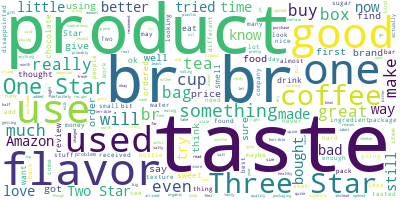

In [20]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [21]:
stop_words = stopwords.words('english')
stop_words.extend(['br','[', ',', '\\', '.', '!', '?', ']', '<', '>', '$', '£', '/', '*', '(', ')', '%', '^', '&', '-', '_', '=', '+', '|', '#','~',';',':','...',"''",'//','\\\\',"n't","'ve","'m","'s"])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(nltk.word_tokenize(str(sentence)))
        
def remove_stopwords(texts):
    return [[(te,ta) for (te,ta) in doc if (te.replace("_NEG","") not in stop_words)] for doc in texts]

data_filtered = data
data_words = list(sent_to_words(data_filtered))
# remove stop words
#data_words = remove_stopwords(data_words)
pprint.pprint(data_words[:5])
#np.array(data_words[0], dtype=object).shape

[['frizz-eaze',
  '?',
  '?',
  '.',
  'I',
  'am',
  'wondering',
  'how',
  'they',
  'are',
  'able',
  'to',
  'put',
  'that',
  'on',
  'the',
  'product',
  '<',
  'br',
  '/',
  '>',
  'it',
  'absolutely',
  'did',
  'nothing',
  'for',
  'my',
  'frizz',
  '<',
  'br',
  '/',
  '>',
  'I',
  'have',
  'tried',
  'it',
  'using',
  'a',
  'small',
  'amount',
  'in',
  'different',
  '<',
  'br',
  '/',
  '>',
  'weather',
  'conditions',
  ',',
  'then',
  'using',
  'a',
  'little',
  'more',
  '<',
  'br',
  '/',
  '>',
  'the',
  'next',
  'time',
  'results',
  'the',
  'same',
  ',',
  'looked',
  'like',
  'I',
  'used',
  'nothing'],
 ['Pink',
  'was',
  "n't",
  'pink',
  '.',
  'The',
  'M',
  '&',
  'M',
  's',
  'had',
  'a',
  'wonderful',
  'taste',
  'however',
  'they',
  'were',
  'not',
  'pink',
  'but',
  'rather',
  'lavender',
  '.',
  'Since',
  'they',
  'were',
  'for',
  'a',
  'baby',
  'shower',
  '(',
  'girl',
  ')',
  'they',
  'were',
  'not',
 

In [22]:
data_words = [[word.lower() for word in data_point] for data_point in data_words]
data_words

[['frizz-eaze',
  '?',
  '?',
  '.',
  'i',
  'am',
  'wondering',
  'how',
  'they',
  'are',
  'able',
  'to',
  'put',
  'that',
  'on',
  'the',
  'product',
  '<',
  'br',
  '/',
  '>',
  'it',
  'absolutely',
  'did',
  'nothing',
  'for',
  'my',
  'frizz',
  '<',
  'br',
  '/',
  '>',
  'i',
  'have',
  'tried',
  'it',
  'using',
  'a',
  'small',
  'amount',
  'in',
  'different',
  '<',
  'br',
  '/',
  '>',
  'weather',
  'conditions',
  ',',
  'then',
  'using',
  'a',
  'little',
  'more',
  '<',
  'br',
  '/',
  '>',
  'the',
  'next',
  'time',
  'results',
  'the',
  'same',
  ',',
  'looked',
  'like',
  'i',
  'used',
  'nothing'],
 ['pink',
  'was',
  "n't",
  'pink',
  '.',
  'the',
  'm',
  '&',
  'm',
  's',
  'had',
  'a',
  'wonderful',
  'taste',
  'however',
  'they',
  'were',
  'not',
  'pink',
  'but',
  'rather',
  'lavender',
  '.',
  'since',
  'they',
  'were',
  'for',
  'a',
  'baby',
  'shower',
  '(',
  'girl',
  ')',
  'they',
  'were',
  'not',
 

In [23]:
import nltk.sentiment.util
tokens = list(map(nltk.word_tokenize, data))
negated_tokens = list(map(nltk.sentiment.util.mark_negation, tokens))
data = negated_tokens

In [24]:
#print(data_words)
def tag(texts):
    #tokens = list(map(nltk.word_tokenize, texts))
    tagged = [nltk.pos_tag(text, tagset='universal') for text in texts]
    negated_tokens = list(map(nltk.sentiment.util.mark_negation, texts))
    negated_tagged = [[(negated_tokens[i][j], tagged[i][j][1]) for j in range(len(texts[i]))] for i in range(len(texts))]
    return negated_tagged
negated_tagged = tag(data_words)
negated_tagged

[[('frizz-eaze', 'NOUN'),
  ('?', '.'),
  ('?', '.'),
  ('.', '.'),
  ('i', 'NOUN'),
  ('am', 'VERB'),
  ('wondering', 'VERB'),
  ('how', 'ADV'),
  ('they', 'PRON'),
  ('are', 'VERB'),
  ('able', 'ADJ'),
  ('to', 'PRT'),
  ('put', 'VERB'),
  ('that', 'DET'),
  ('on', 'ADP'),
  ('the', 'DET'),
  ('product', 'NOUN'),
  ('<', 'NOUN'),
  ('br', 'NOUN'),
  ('/', 'NOUN'),
  ('>', 'VERB'),
  ('it', 'PRON'),
  ('absolutely', 'ADV'),
  ('did', 'VERB'),
  ('nothing', 'NOUN'),
  ('for_NEG', 'ADP'),
  ('my_NEG', 'PRON'),
  ('frizz_NEG', 'ADJ'),
  ('<_NEG', 'NOUN'),
  ('br_NEG', 'NOUN'),
  ('/_NEG', 'NOUN'),
  ('>_NEG', 'NOUN'),
  ('i_NEG', 'NOUN'),
  ('have_NEG', 'VERB'),
  ('tried_NEG', 'VERB'),
  ('it_NEG', 'PRON'),
  ('using_NEG', 'VERB'),
  ('a_NEG', 'DET'),
  ('small_NEG', 'ADJ'),
  ('amount_NEG', 'NOUN'),
  ('in_NEG', 'ADP'),
  ('different_NEG', 'ADJ'),
  ('<_NEG', 'NOUN'),
  ('br_NEG', 'NOUN'),
  ('/_NEG', 'NOUN'),
  ('>_NEG', 'NOUN'),
  ('weather_NEG', 'NOUN'),
  ('conditions_NEG', 'NOUN')

In [25]:
data_words = remove_stopwords(negated_tagged)
data_words

[[('frizz-eaze', 'NOUN'),
  ('wondering', 'VERB'),
  ('able', 'ADJ'),
  ('put', 'VERB'),
  ('product', 'NOUN'),
  ('absolutely', 'ADV'),
  ('nothing', 'NOUN'),
  ('frizz_NEG', 'ADJ'),
  ('tried_NEG', 'VERB'),
  ('using_NEG', 'VERB'),
  ('small_NEG', 'ADJ'),
  ('amount_NEG', 'NOUN'),
  ('different_NEG', 'ADJ'),
  ('weather_NEG', 'NOUN'),
  ('conditions_NEG', 'NOUN'),
  ('using_NEG', 'VERB'),
  ('little_NEG', 'ADV'),
  ('next_NEG', 'ADJ'),
  ('time_NEG', 'NOUN'),
  ('results_NEG', 'NOUN'),
  ('looked_NEG', 'VERB'),
  ('like_NEG', 'ADP'),
  ('used_NEG', 'VERB'),
  ('nothing_NEG', 'NOUN')],
 [('pink', 'NOUN'),
  ('pink_NEG', 'VERB'),
  ('wonderful', 'ADJ'),
  ('taste', 'NOUN'),
  ('however', 'ADV'),
  ('pink_NEG', 'VERB'),
  ('rather_NEG', 'ADV'),
  ('lavender_NEG', 'NOUN'),
  ('since', 'ADP'),
  ('baby', 'NOUN'),
  ('shower', 'NOUN'),
  ('girl', 'NOUN'),
  ('appropriate_NEG', 'ADJ'),
  ('used_NEG', 'VERB'),
  ('anyway_NEG', 'ADV')],
 [('three', 'NUM'),
  ('stars', 'NOUN'),
  ('ok', 'ADJ')

In [33]:
#gets adjectives

def get_adjectives(tagged):
    review_a = [word for (word, tag) in tagged if (tag == 'NOUN' or tag == 'ADJ' or tag == 'ADV' or tag == 'VERB')]
    return review_a

data_words = list(map(lambda x: get_adjectives(x), data_words))

'''
for i in range(len(data_words)):
    data_words[i] = [word for (word,tag) in data_words[i]]
'''
data_words


C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: too many values to unpack (expected 2)

In [ ]:
pprint.pprint(data[4])

In [34]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
pprint.pprint(corpus[:5])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)],
 [(15, 1), (16, 1)],
 [(17, 1), (18, 1)],
 [(16, 1), (19, 1), (20, 1)]]


C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
# number of topics
num_topics = 50
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       minimum_probability=0.1,
                                       workers=3,
                                       passes=2)
# Print the Keyword in the 10 topics
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(27,
  '0.032*"stars" + 0.019*"contains" + 0.018*"trans" + 0.018*"fats" + '
  '0.009*"taste" + 0.008*"sugar" + 0.007*"something" + 0.006*"daughter" + '
  '0.006*"product" + 0.006*"product_NEG"'),
 (28,
  '0.021*"almonds" + 0.016*"almond" + 0.016*"sweet" + 0.015*"something" + '
  '0.015*"spicy" + 0.015*"directions" + 0.013*"pecou" + 0.010*"stars" + '
  '0.010*"weeks" + 0.009*"bar"'),
 (32,
  '0.017*"stars" + 0.016*"bottom" + 0.016*"cup" + 0.015*"price" + '
  '0.015*"shipping" + 0.015*"star" + 0.015*"thing" + 0.015*"candy" + '
  '0.015*"drawer" + 0.014*"spike"'),
 (40,
  '0.037*"product" + 0.036*"price" + 0.029*"sauce" + 0.023*"cheerios" + '
  '0.019*"shells" + 0.017*"box" + 0.015*"use" + 0.014*"expectations" + '
  '0.013*"bottle" + 0.013*"subscribe"'),
 (4,
  '0.020*"stuff" + 0.019*"product" + 0.018*"pistachios" + 0.016*"stars" + '
  '0.014*"taste" + 0.014*"tea" + 0.010*"taste_NEG" + 0.009*"something" + '
  '0.009*"people" + 0.009*"vinegar"'),
 (35,
  '0.030*"cake_NEG" + 0.022*"chip_NE

In [40]:
pprint.pprint(lda_model.print_topics(num_topics=100))

[(0,
  '0.052*"fan_NEG" + 0.035*"replacement_NEG" + 0.026*"butter_NEG" + '
  '0.026*"taste_NEG" + 0.025*"stuff_NEG" + 0.023*"peanut_NEG" + 0.016*"stars" '
  '+ 0.008*"tea" + 0.008*"company" + 0.008*"something"'),
 (1,
  '0.034*"tea" + 0.023*"flavor" + 0.020*"time" + 0.017*"flavor_NEG" + '
  '0.016*"taste" + 0.016*"stars" + 0.015*"clothes" + 0.013*"product" + '
  '0.013*"order" + 0.012*"water"'),
 (2,
  '0.059*"stars" + 0.047*"cups" + 0.028*"contents" + 0.024*"ok" + '
  '0.021*"beware" + 0.019*"machine_NEG" + 0.019*"buyer" + 0.018*"shop" + '
  '0.017*"sister" + 0.017*"variety"'),
 (3,
  '0.032*"shipment" + 0.031*"stars" + 0.030*"coffee" + 0.026*"pouches" + '
  '0.023*"way" + 0.022*"juice" + 0.021*"cookies" + 0.018*"case" + '
  '0.018*"kerusso" + 0.016*"store"'),
 (4,
  '0.020*"stuff" + 0.019*"product" + 0.018*"pistachios" + 0.016*"stars" + '
  '0.014*"taste" + 0.014*"tea" + 0.010*"taste_NEG" + 0.009*"something" + '
  '0.009*"people" + 0.009*"vinegar"'),
 (5,
  '0.036*"k-cups" + 0.023*"c

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
from itertools import chain
lda_corpus = lda_model[corpus]

# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = list(chain(*[[score for topic_id,score in topic] for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)


C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
data_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

pyLDAvis.display(data_vis)

C:\Users\MattW\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(threshold)

In [43]:
'''cluster1 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[0][1] > threshold]
print(1)
cluster2 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[1][1] > threshold]
print(2)
cluster3 = [j for i,j in zip(lda_corpus[:100],texts[:100]) if i[2][1] > threshold]
print(3)
'''

1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: list index out of range

In [ ]:
'''print(cluster1[:100], "\n \n")
print(cluster2[:100], "\n \n")
print(cluster3[:100], "\n")
'''